<a href="https://colab.research.google.com/github/Lasttrader/Neural_network_mnist/blob/master/Mnist_train_test_%26_retraining_t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оценка качества обучения нейронной сети в Keras

На примере распознаванию рукописных цифр из **набора данных MNIST**.


In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from tensorflow.python.keras.optimizers import Adam, RMSprop

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [0]:

# x_train_org - изображения из набора данных для обучения
# y_train_org - правильные ответы (метки) к набору данных для обучения
# x_test_org - изображения из набора данных для тестирования
# y_test_org - правильные ответы (метки) к набору данных для тестирования

(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

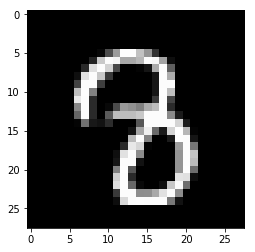

In [0]:
n = 1394
plt.imshow(Image.fromarray(x_test_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [0]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [0]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно

x_train = x_train.astype('float32')
x_train = x_train / 255 
x_test = x_test.astype('float32')
x_test = x_test / 255 

**Работа с правильными ответами**

In [0]:
print(y_test_org[n])

8


**Преобразуем метки в формат one hot encoding**

In [0]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [0]:
print(y_test[n])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Нейронная сеть

**Создаем последовательную модель**

In [0]:
model = Sequential()

**Добавляем уровни сети**


In [0]:
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))

# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 800)               628000    
_________________________________________________________________
dense_159 (Dense)            (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [0]:
# Обучающая выборка
history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2764 - acc: 0.9222
Epoch 2/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1116 - acc: 0.9675
Epoch 3/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0704 - acc: 0.9793
Epoch 4/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0505 - acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0363 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0266 - acc: 0.9926
Epoch 7/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0188 - acc: 0.9955
Epoch 8/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0149 - acc: 0.9965
Epoch 9/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0104 - acc: 0.9980
Epoch 10/10
60000/60000 [==============================] - 1s 21us/sample - loss: 

## Проверка качество обучения на тестовом наборе данных

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)


10000/10000 [==============================] - 1s 108us/sample - loss: 0.0584 - acc: 0.9811


In [0]:
scores

[0.05835832805889077, 0.9811]

In [0]:
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

Доля верных ответов на тестовых данных, в процентах: 98.11%


#Проверочная выборка

In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(100, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 51us/sample - loss: 0.4785 - acc: 0.8692 - val_loss: 0.2434 - val_acc: 0.9346
Epoch 2/10
48000/48000 [==============================] - 1s 22us/sample - loss: 0.2194 - acc: 0.9385 - val_loss: 0.1877 - val_acc: 0.9477
Epoch 3/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1676 - acc: 0.9528 - val_loss: 0.1552 - val_acc: 0.9571
Epoch 4/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1355 - acc: 0.9613 - val_loss: 0.1443 - val_acc: 0.9588
Epoch 5/10
48000/48000 [==============================] - 1s 22us/sample - loss: 0.1132 - acc: 0.9684 - val_loss: 0.1247 - val_acc: 0.9641
Epoch 6/10
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0986 - acc: 0.9720 - val_loss: 0.1186 - val_acc: 0.9665
Epoch 7/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0853 - acc: 0.9760 - val_loss: 0.

In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

nVal = 40000

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=10,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

Train on 40000 samples, validate on 20000 samples
Epoch 1/10
40000/40000 [==============================] - 3s 66us/sample - loss: 0.3406 - acc: 0.9046 - val_loss: 0.1780 - val_acc: 0.9485
Epoch 2/10
40000/40000 [==============================] - 1s 27us/sample - loss: 0.1370 - acc: 0.9611 - val_loss: 0.1426 - val_acc: 0.9586
Epoch 3/10
40000/40000 [==============================] - 1s 29us/sample - loss: 0.0903 - acc: 0.9738 - val_loss: 0.1044 - val_acc: 0.9696
Epoch 4/10
40000/40000 [==============================] - 1s 28us/sample - loss: 0.0621 - acc: 0.9818 - val_loss: 0.0981 - val_acc: 0.9710
Epoch 5/10
40000/40000 [==============================] - 1s 27us/sample - loss: 0.0448 - acc: 0.9882 - val_loss: 0.0959 - val_acc: 0.9716
Epoch 6/10
40000/40000 [==============================] - 1s 29us/sample - loss: 0.0338 - acc: 0.9912 - val_loss: 0.0885 - val_acc: 0.9737
Epoch 7/10
40000/40000 [==============================] - 1s 28us/sample - loss: 0.0247 - acc: 0.9947 - val_loss: 0.

## Визуализация качества обучения


Состав словаря History

In [0]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Значения ошибки на обучающем наборе данных

In [0]:
history.history['loss']

[0.3406164585053921,
 0.1369855295494199,
 0.09033477648161352,
 0.06205989873036742,
 0.04478090018033981,
 0.03384684553835541,
 0.024733750117011368,
 0.018100754539482296,
 0.01373173512867652,
 0.009582879025256261]

Печатаем долю правильных ответов на проверочном наборе данных

In [0]:
history.history['val_acc']

[0.94855,
 0.95865,
 0.96955,
 0.97095,
 0.9716,
 0.97375,
 0.97475,
 0.9754,
 0.97565,
 0.97665]

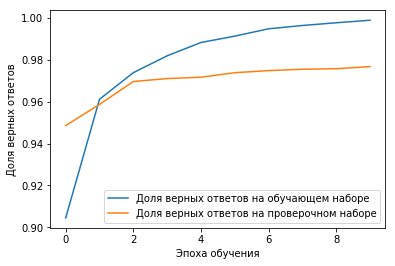

In [0]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

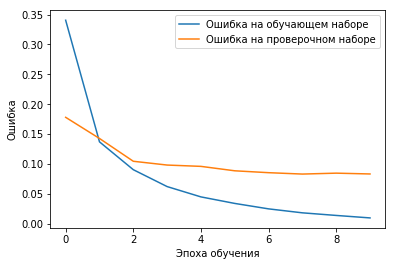

In [0]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

#Проверка гипотез переобучения 

**Без Dropout**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 25ms/sample - loss: 2.3641 - acc: 0.1400 - val_loss: 56.9459 - val_acc: 0.2208
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 36.7969 - acc: 0.4100 - val_loss: 70.8183 - val_acc: 0.2986
Epoch 3/50
100/100 [==============================] - 1s 9ms/sample - loss: 67.8218 - acc: 0.4400 - val_loss: 54.2566 - val_acc: 0.2775
Epoch 4/50
100/100 [==============================] - 1s 9ms/sample - loss: 58.6024 - acc: 0.4100 - val_loss: 41.6302 - val_acc: 0.2588
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 44.9424 - acc: 0.3500 - val_loss: 23.4647 - val_acc: 0.4422
Epoch 6/50
100/100 [==============================] - 1s 9ms/sample - loss: 20.4436 - acc: 0.5300 - val_loss: 10.8624 - val_acc: 0.4971
Epoch 7/50
100/100 [==============================] - 1s 9ms/sample - loss: 4.6180 - acc: 0.7000 - val_loss: 8.8411 - val_acc: 0.5351
E

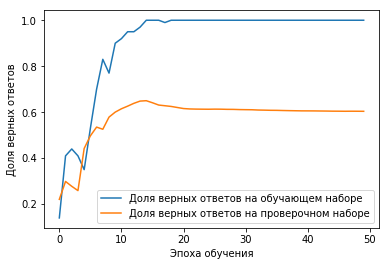

In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Dropout 30%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 26ms/sample - loss: 2.4401 - acc: 0.0700 - val_loss: 46.1387 - val_acc: 0.2192
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 34.3251 - acc: 0.3200 - val_loss: 54.9673 - val_acc: 0.2214
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 53.7146 - acc: 0.3700 - val_loss: 36.9936 - val_acc: 0.2772
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 39.8019 - acc: 0.3200 - val_loss: 16.1756 - val_acc: 0.3741
Epoch 5/50
100/100 [==============================] - 1s 9ms/sample - loss: 12.6998 - acc: 0.4700 - val_loss: 10.9440 - val_acc: 0.4341
Epoch 6/50
100/100 [==============================] - 1s 9ms/sample - loss: 4.9051 - acc: 0.6800 - val_loss: 12.6522 - val_acc: 0.4577
Epoch 7/50
100/100 [==============================] - 1s 9ms/sample - loss: 5.2214 - acc: 0.7200 - val_loss: 10.7951 - val_acc: 0.5113


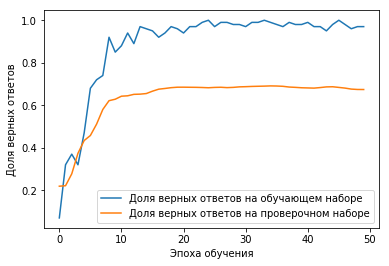

In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.3))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Dropout 80%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 2s 25ms/sample - loss: 2.5793 - acc: 0.0900 - val_loss: 16.6424 - val_acc: 0.3991
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 24.6743 - acc: 0.2000 - val_loss: 42.3006 - val_acc: 0.1889
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 47.9373 - acc: 0.2700 - val_loss: 35.4310 - val_acc: 0.2081
Epoch 4/50
100/100 [==============================] - 1s 9ms/sample - loss: 37.3258 - acc: 0.2900 - val_loss: 12.2549 - val_acc: 0.5126
Epoch 5/50
100/100 [==============================] - 1s 9ms/sample - loss: 14.8058 - acc: 0.5500 - val_loss: 11.6535 - val_acc: 0.5406
Epoch 6/50
100/100 [==============================] - 1s 9ms/sample - loss: 11.4807 - acc: 0.5800 - val_loss: 11.9898 - val_acc: 0.5377
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 12.4712 - acc: 0.6000 - val_loss: 10.3070 - val_acc: 0.554

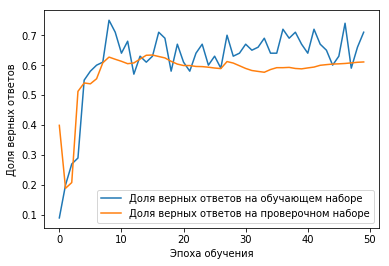

In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.8))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Dropout 10%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 25ms/sample - loss: 2.3697 - acc: 0.0600 - val_loss: 70.5340 - val_acc: 0.1004
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 50.2667 - acc: 0.1400 - val_loss: 52.6544 - val_acc: 0.4220
Epoch 3/50
100/100 [==============================] - 1s 9ms/sample - loss: 51.0656 - acc: 0.5200 - val_loss: 59.2419 - val_acc: 0.2473
Epoch 4/50
100/100 [==============================] - 1s 9ms/sample - loss: 59.9183 - acc: 0.3800 - val_loss: 46.5871 - val_acc: 0.2323
Epoch 5/50
100/100 [==============================] - 1s 9ms/sample - loss: 46.3192 - acc: 0.3200 - val_loss: 22.9218 - val_acc: 0.2715
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 17.0849 - acc: 0.4300 - val_loss: 11.1911 - val_acc: 0.5319
Epoch 7/50
100/100 [==============================] - 1s 9ms/sample - loss: 4.3730 - acc: 0.7500 - val_loss: 12.9285 - val_acc: 0.5672


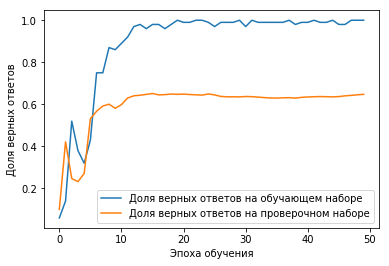

In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.1))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Активационные функции

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 55us/sample - loss: 1.9783 - acc: 0.6802 - val_loss: 1.7012 - val_acc: 0.7719
Epoch 2/20
48000/48000 [==============================] - 1s 21us/sample - loss: 1.5335 - acc: 0.7670 - val_loss: 1.3683 - val_acc: 0.7743
Epoch 3/20
48000/48000 [==============================] - 1s 21us/sample - loss: 1.2486 - acc: 0.7771 - val_loss: 1.1272 - val_acc: 0.7905
Epoch 4/20
48000/48000 [==============================] - 1s 21us/sample - loss: 1.0403 - acc: 0.7894 - val_loss: 0.9512 - val_acc: 0.7999
Epoch 5/20
48000/48000 [==============================] - 1s 22us/sample - loss: 0.8883 - acc: 0.7997 - val_loss: 0.8211 - val_acc: 0.8098
Epoch 6/20
48000/48000 [==============================] - 1s 23us/sample - loss: 0.7757 - acc: 0.8083 - val_loss: 0.7263 - val_acc: 0.8224
Epoch 7/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.6907 - acc: 0.8203 - val_loss: 0.

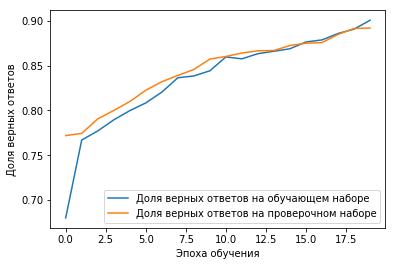

In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(100, input_dim=784, activation="softmax"))
#model.add(Dropout(0.2))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Усреднение точности сети по нескольким итерациям

In [0]:
valAcc = []
iterations = 10

for i in range(iterations):
  model = Sequential()

  # Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
  model.add(Dense(10, input_dim=784, activation="relu"))
  #model.add(Dropout(0.2))
  # Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
  model.add(Dense(10, activation="softmax"))

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  history = model.fit(x_train, 
                      y_train, 
                      batch_size=200, 
                      epochs=5,
                      validation_split=0.2,
                      verbose=0)
  
  currAcc = history.history['val_acc'][-1]
  valAcc.append(currAcc)
  print("Запуск", i, "точность", currAcc)
  

Запуск 0 точность 0.92333335
Запуск 1 точность 0.9245
Запуск 2 точность 0.924
Запуск 3 точность 0.92575
Запуск 4 точность 0.92508334
Запуск 5 точность 0.92041665
Запуск 6 точность 0.9228333
Запуск 7 точность 0.9205833
Запуск 8 точность 0.9191667
Запуск 9 точность 0.92508334


In [0]:
valAcc = np.array(valAcc)
meanAcc = sum(valAcc) / valAcc.shape[0]
print(meanAcc)
print(max(valAcc) - min(valAcc))

0.9230750024318695
0.006583333


#Запуск нескольких сетей

In [0]:
def evaluateModel(model, batchSize, epohs, valSplit):
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  history = model.fit(x_train, 
                      y_train, 
                      batch_size=batchSize, 
                      epochs=epohs,
                      validation_split=valSplit,
                      verbose=0)
  
  currAcc = history.history['val_acc'][-1]
  
  return currAcc, history

In [0]:
models = []

model = Sequential()
model.add(Dense(10, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(20, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(30, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
models.append(model)

batchSisez = [100, 200, 300]

acc = []
hist = []
for i in range(len(models)):
  currAcc, currHistory = evaluateModel(models[i], batchSisez[i], 5, 0.2)
  acc.append(currAcc)
  hist.append(currHistory)
  
print(acc)

[0.9259167, 0.9418333, 0.93916667]


In [0]:
print(hist[0].history['val_acc'])

[0.8936667, 0.90933335, 0.91683334, 0.9205, 0.9259167]


# **ЭКСПЕРЕМЕНТ DROPUOT**

**Без dropuot**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 30ms/sample - loss: 2.3256 - acc: 0.1100 - val_loss: 31.5910 - val_acc: 0.2617
Epoch 2/50
100/100 [==============================] - 1s 10ms/sample - loss: 17.9660 - acc: 0.4700 - val_loss: 110.3278 - val_acc: 0.2497
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 105.2817 - acc: 0.3300 - val_loss: 76.3885 - val_acc: 0.3400
Epoch 4/50
100/100 [==============================] - 1s 11ms/sample - loss: 78.0134 - acc: 0.4000 - val_loss: 42.0878 - val_acc: 0.2988
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 38.7768 - acc: 0.3300 - val_loss: 11.1977 - val_acc: 0.3875
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 7.1115 - acc: 0.5200 - val_loss: 9.2208 - val_acc: 0.4022
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 4.4684 - acc: 0.6300 - val_loss: 7.7283 - val_acc: 0.4

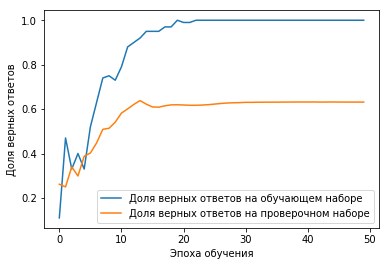

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Propuot 10%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 29ms/sample - loss: 2.4346 - acc: 0.0600 - val_loss: 44.2505 - val_acc: 0.3866
Epoch 2/50
100/100 [==============================] - 1s 10ms/sample - loss: 28.1816 - acc: 0.4900 - val_loss: 53.8429 - val_acc: 0.2215
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 44.9758 - acc: 0.2700 - val_loss: 35.7259 - val_acc: 0.2883
Epoch 4/50
100/100 [==============================] - 1s 11ms/sample - loss: 29.3779 - acc: 0.4000 - val_loss: 19.2559 - val_acc: 0.3919
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 12.1635 - acc: 0.5300 - val_loss: 20.3058 - val_acc: 0.3257
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 7.9661 - acc: 0.5100 - val_loss: 13.3144 - val_acc: 0.4433
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 3.9887 - acc: 0.7000 - val_loss: 8.2188 - val_acc: 0.52

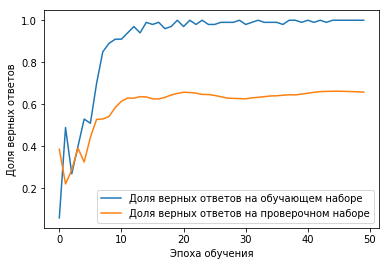

In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.1))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropuot 15%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 30ms/sample - loss: 2.3160 - acc: 0.0900 - val_loss: 24.5007 - val_acc: 0.3411
Epoch 2/50
100/100 [==============================] - 1s 10ms/sample - loss: 13.7305 - acc: 0.4600 - val_loss: 66.9954 - val_acc: 0.3414
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 54.7871 - acc: 0.4600 - val_loss: 76.5551 - val_acc: 0.2895
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 71.7892 - acc: 0.3700 - val_loss: 50.1218 - val_acc: 0.2202
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 36.1763 - acc: 0.3500 - val_loss: 19.3425 - val_acc: 0.3941
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 9.7097 - acc: 0.5900 - val_loss: 11.1356 - val_acc: 0.5359
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 2.2734 - acc: 0.7600 - val_loss: 16.4157 - val_acc: 0.4

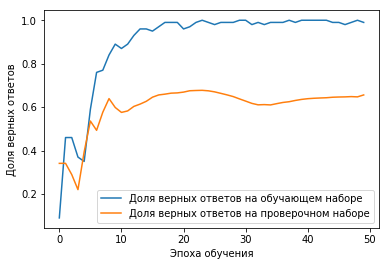

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.15))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 20%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 30ms/sample - loss: 2.4066 - acc: 0.0800 - val_loss: 57.0927 - val_acc: 0.2012
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 39.5088 - acc: 0.2500 - val_loss: 50.9888 - val_acc: 0.4093
Epoch 3/50
100/100 [==============================] - 1s 9ms/sample - loss: 48.4920 - acc: 0.5400 - val_loss: 35.8080 - val_acc: 0.3330
Epoch 4/50
100/100 [==============================] - 1s 9ms/sample - loss: 41.5293 - acc: 0.4400 - val_loss: 27.1864 - val_acc: 0.2781
Epoch 5/50
100/100 [==============================] - 1s 11ms/sample - loss: 22.7053 - acc: 0.4600 - val_loss: 14.3510 - val_acc: 0.4079
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 8.1552 - acc: 0.6300 - val_loss: 10.3080 - val_acc: 0.4448
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 2.8412 - acc: 0.7200 - val_loss: 7.0743 - val_acc: 0.4841


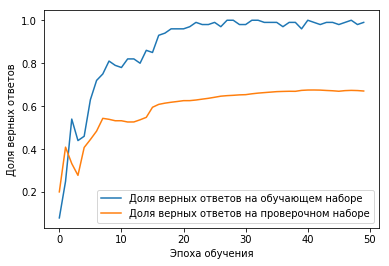

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.20))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 25%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 32ms/sample - loss: 2.4504 - acc: 0.0500 - val_loss: 49.9892 - val_acc: 0.1393
Epoch 2/50
100/100 [==============================] - 1s 10ms/sample - loss: 34.8379 - acc: 0.1800 - val_loss: 50.3296 - val_acc: 0.3808
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 50.7940 - acc: 0.5000 - val_loss: 65.8686 - val_acc: 0.2869
Epoch 4/50
100/100 [==============================] - 1s 11ms/sample - loss: 73.0097 - acc: 0.2900 - val_loss: 34.2026 - val_acc: 0.2985
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 37.6648 - acc: 0.4600 - val_loss: 19.5853 - val_acc: 0.4229
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 16.9784 - acc: 0.5700 - val_loss: 12.9186 - val_acc: 0.4984
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 4.8084 - acc: 0.7300 - val_loss: 15.3086 - val_acc: 0.

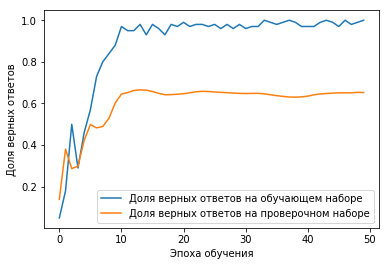

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.25))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 30%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 29ms/sample - loss: 2.4980 - acc: 0.0900 - val_loss: 51.8724 - val_acc: 0.1625
Epoch 2/50
100/100 [==============================] - 1s 11ms/sample - loss: 37.0047 - acc: 0.2200 - val_loss: 48.1668 - val_acc: 0.3559
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 37.2594 - acc: 0.5000 - val_loss: 54.2303 - val_acc: 0.3031
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 45.1994 - acc: 0.3700 - val_loss: 33.8092 - val_acc: 0.3117
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 27.5215 - acc: 0.3600 - val_loss: 19.4875 - val_acc: 0.4381
Epoch 6/50
100/100 [==============================] - 1s 11ms/sample - loss: 13.1756 - acc: 0.5800 - val_loss: 11.3310 - val_acc: 0.4665
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 3.9198 - acc: 0.6800 - val_loss: 17.3059 - val_acc: 0.

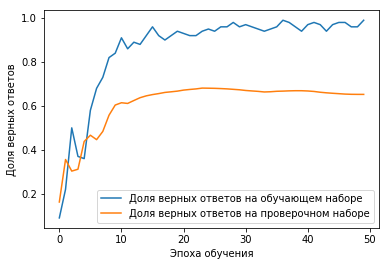

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.30))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 35%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 32ms/sample - loss: 2.3476 - acc: 0.1700 - val_loss: 34.5874 - val_acc: 0.2607
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 21.2508 - acc: 0.3700 - val_loss: 67.7094 - val_acc: 0.3165
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 54.6798 - acc: 0.4600 - val_loss: 53.2575 - val_acc: 0.3147
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 47.1479 - acc: 0.3600 - val_loss: 22.2483 - val_acc: 0.3932
Epoch 5/50
100/100 [==============================] - 1s 9ms/sample - loss: 15.1196 - acc: 0.5100 - val_loss: 8.6172 - val_acc: 0.5188
Epoch 6/50
100/100 [==============================] - 1s 9ms/sample - loss: 4.0072 - acc: 0.7400 - val_loss: 7.5614 - val_acc: 0.5709
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 1.8836 - acc: 0.8500 - val_loss: 11.8761 - val_acc: 0.5424
E

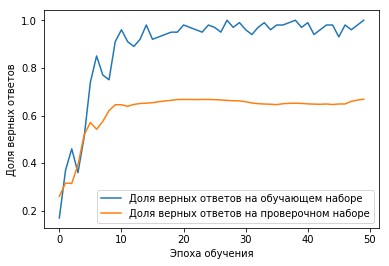

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.35))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 40%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 31ms/sample - loss: 2.3752 - acc: 0.1400 - val_loss: 51.5709 - val_acc: 0.2863
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 38.9949 - acc: 0.3300 - val_loss: 45.1166 - val_acc: 0.3405
Epoch 3/50
100/100 [==============================] - 1s 9ms/sample - loss: 34.5726 - acc: 0.4900 - val_loss: 43.7035 - val_acc: 0.2101
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 37.8463 - acc: 0.2800 - val_loss: 15.7205 - val_acc: 0.3506
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 10.4139 - acc: 0.5500 - val_loss: 9.6938 - val_acc: 0.5177
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 3.8906 - acc: 0.7100 - val_loss: 17.0931 - val_acc: 0.4767
Epoch 7/50
100/100 [==============================] - 1s 9ms/sample - loss: 5.7957 - acc: 0.6600 - val_loss: 12.9133 - val_acc: 0.5289


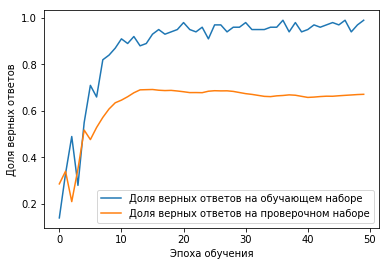

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.40))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 45%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 31ms/sample - loss: 2.3587 - acc: 0.1300 - val_loss: 32.3938 - val_acc: 0.3734
Epoch 2/50
100/100 [==============================] - 1s 11ms/sample - loss: 19.1903 - acc: 0.5000 - val_loss: 59.5913 - val_acc: 0.3422
Epoch 3/50
100/100 [==============================] - 1s 9ms/sample - loss: 61.2852 - acc: 0.4000 - val_loss: 46.9290 - val_acc: 0.2713
Epoch 4/50
100/100 [==============================] - 1s 9ms/sample - loss: 48.8986 - acc: 0.3400 - val_loss: 18.6520 - val_acc: 0.4525
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 13.1097 - acc: 0.6200 - val_loss: 22.2091 - val_acc: 0.4123
Epoch 6/50
100/100 [==============================] - 1s 11ms/sample - loss: 6.4219 - acc: 0.6600 - val_loss: 19.8258 - val_acc: 0.4667
Epoch 7/50
100/100 [==============================] - 1s 9ms/sample - loss: 5.8126 - acc: 0.6900 - val_loss: 12.9194 - val_acc: 0.5487

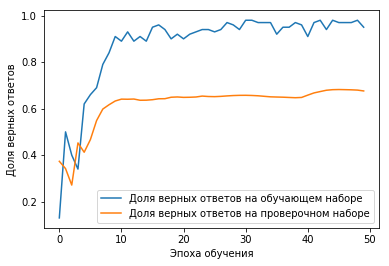

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.45))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 50%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 32ms/sample - loss: 2.4197 - acc: 0.0900 - val_loss: 37.4488 - val_acc: 0.2432
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 23.5780 - acc: 0.3400 - val_loss: 52.7415 - val_acc: 0.2990
Epoch 3/50
100/100 [==============================] - 1s 9ms/sample - loss: 53.7687 - acc: 0.3700 - val_loss: 47.7151 - val_acc: 0.3254
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 55.8786 - acc: 0.4000 - val_loss: 28.6344 - val_acc: 0.2990
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 27.8697 - acc: 0.4400 - val_loss: 14.1538 - val_acc: 0.4334
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 7.1562 - acc: 0.6500 - val_loss: 12.5392 - val_acc: 0.5594
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 4.1693 - acc: 0.7800 - val_loss: 14.5634 - val_acc: 0.548

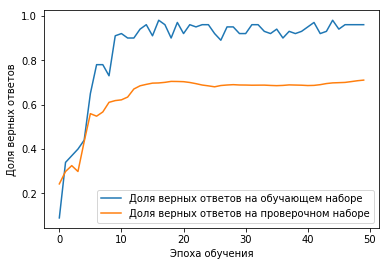

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.50))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 55%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 33ms/sample - loss: 2.4706 - acc: 0.0600 - val_loss: 19.6012 - val_acc: 0.2869
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 14.0285 - acc: 0.3300 - val_loss: 39.6289 - val_acc: 0.4657
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 33.7957 - acc: 0.5500 - val_loss: 53.3219 - val_acc: 0.2460
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 49.5585 - acc: 0.3100 - val_loss: 21.2627 - val_acc: 0.4532
Epoch 5/50
100/100 [==============================] - 1s 9ms/sample - loss: 13.8308 - acc: 0.6600 - val_loss: 19.6185 - val_acc: 0.5158
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 10.6266 - acc: 0.7200 - val_loss: 14.7924 - val_acc: 0.5666
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 5.6634 - acc: 0.7300 - val_loss: 15.1099 - val_acc: 0.55

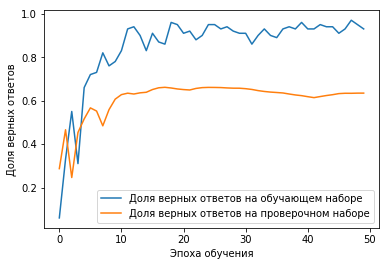

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.55))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 60%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 33ms/sample - loss: 2.3851 - acc: 0.0900 - val_loss: 50.8499 - val_acc: 0.1148
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 37.1067 - acc: 0.2100 - val_loss: 46.6426 - val_acc: 0.3685
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 47.4064 - acc: 0.4100 - val_loss: 49.6055 - val_acc: 0.3137
Epoch 4/50
100/100 [==============================] - 1s 11ms/sample - loss: 60.2787 - acc: 0.3600 - val_loss: 21.7890 - val_acc: 0.4514
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 22.6292 - acc: 0.6200 - val_loss: 12.2805 - val_acc: 0.4472
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 6.2704 - acc: 0.6800 - val_loss: 12.5795 - val_acc: 0.5175
Epoch 7/50
100/100 [==============================] - 1s 11ms/sample - loss: 6.5067 - acc: 0.6800 - val_loss: 11.6534 - val_acc: 0.52

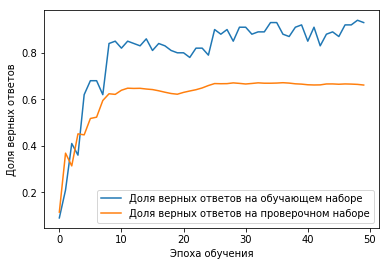

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.60))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 65%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 34ms/sample - loss: 2.4253 - acc: 0.1300 - val_loss: 25.9148 - val_acc: 0.2820
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 22.0111 - acc: 0.3500 - val_loss: 60.4132 - val_acc: 0.2917
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 62.3594 - acc: 0.3400 - val_loss: 30.9134 - val_acc: 0.3277
Epoch 4/50
100/100 [==============================] - 1s 11ms/sample - loss: 34.6450 - acc: 0.3800 - val_loss: 13.7623 - val_acc: 0.4302
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 10.8332 - acc: 0.6200 - val_loss: 11.9479 - val_acc: 0.5271
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 8.3197 - acc: 0.6500 - val_loss: 10.2594 - val_acc: 0.5633
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 4.5136 - acc: 0.7900 - val_loss: 8.3597 - val_acc: 0.604

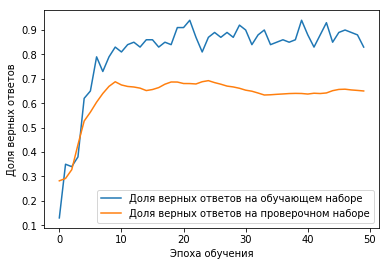

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.65))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 70%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 32ms/sample - loss: 2.5025 - acc: 0.1100 - val_loss: 41.3530 - val_acc: 0.2368
Epoch 2/50
100/100 [==============================] - 1s 10ms/sample - loss: 35.3618 - acc: 0.3200 - val_loss: 45.4844 - val_acc: 0.2196
Epoch 3/50
100/100 [==============================] - 1s 9ms/sample - loss: 56.1540 - acc: 0.2500 - val_loss: 31.9550 - val_acc: 0.2298
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 40.7792 - acc: 0.3000 - val_loss: 12.0015 - val_acc: 0.4140
Epoch 5/50
100/100 [==============================] - 1s 9ms/sample - loss: 13.9492 - acc: 0.4500 - val_loss: 13.9534 - val_acc: 0.4262
Epoch 6/50
100/100 [==============================] - 1s 11ms/sample - loss: 9.7488 - acc: 0.5400 - val_loss: 10.9177 - val_acc: 0.5390
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 5.0701 - acc: 0.6100 - val_loss: 9.6015 - val_acc: 0.5777

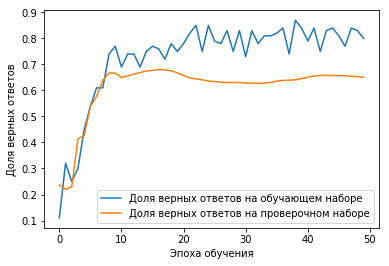

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.70))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 75%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 34ms/sample - loss: 2.5322 - acc: 0.1200 - val_loss: 27.8497 - val_acc: 0.2295
Epoch 2/50
100/100 [==============================] - 1s 10ms/sample - loss: 24.5281 - acc: 0.2600 - val_loss: 38.5134 - val_acc: 0.1842
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 54.4462 - acc: 0.2100 - val_loss: 21.4813 - val_acc: 0.4206
Epoch 4/50
100/100 [==============================] - 1s 9ms/sample - loss: 30.4136 - acc: 0.3700 - val_loss: 14.6186 - val_acc: 0.4622
Epoch 5/50
100/100 [==============================] - 1s 9ms/sample - loss: 14.8002 - acc: 0.5700 - val_loss: 11.0234 - val_acc: 0.5080
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 9.1613 - acc: 0.6200 - val_loss: 14.1565 - val_acc: 0.4743
Epoch 7/50
100/100 [==============================] - 1s 11ms/sample - loss: 12.4064 - acc: 0.5700 - val_loss: 9.4343 - val_acc: 0.565

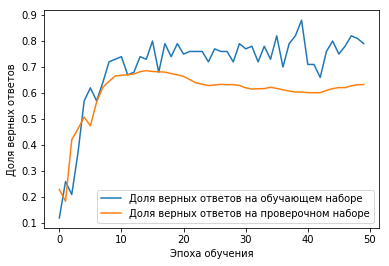

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.75))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 80%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 35ms/sample - loss: 2.6422 - acc: 0.1300 - val_loss: 11.0786 - val_acc: 0.4148
Epoch 2/50
100/100 [==============================] - 1s 9ms/sample - loss: 17.1282 - acc: 0.3600 - val_loss: 24.4770 - val_acc: 0.2649
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 27.7152 - acc: 0.3200 - val_loss: 16.0503 - val_acc: 0.4292
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 25.4656 - acc: 0.4300 - val_loss: 14.9875 - val_acc: 0.5397
Epoch 5/50
100/100 [==============================] - 1s 9ms/sample - loss: 17.7584 - acc: 0.4900 - val_loss: 14.5581 - val_acc: 0.5458
Epoch 6/50
100/100 [==============================] - 1s 9ms/sample - loss: 10.7604 - acc: 0.6500 - val_loss: 11.2232 - val_acc: 0.5799
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 11.9509 - acc: 0.6000 - val_loss: 7.1225 - val_acc: 0.643

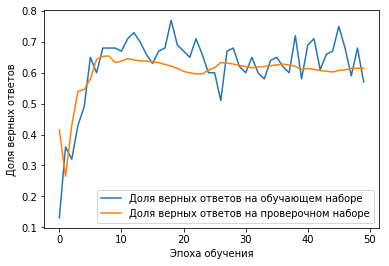

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.80))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 85%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 34ms/sample - loss: 2.7505 - acc: 0.0900 - val_loss: 34.2366 - val_acc: 0.1043
Epoch 2/50
100/100 [==============================] - 1s 11ms/sample - loss: 35.7234 - acc: 0.2000 - val_loss: 34.4914 - val_acc: 0.2071
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 53.4851 - acc: 0.2200 - val_loss: 21.3845 - val_acc: 0.3324
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 32.7074 - acc: 0.2900 - val_loss: 8.8734 - val_acc: 0.5235
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 21.7564 - acc: 0.4500 - val_loss: 8.6406 - val_acc: 0.5921
Epoch 6/50
100/100 [==============================] - 1s 11ms/sample - loss: 12.2900 - acc: 0.5300 - val_loss: 8.8243 - val_acc: 0.5704
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 10.0066 - acc: 0.5200 - val_loss: 7.9346 - val_acc: 0.587

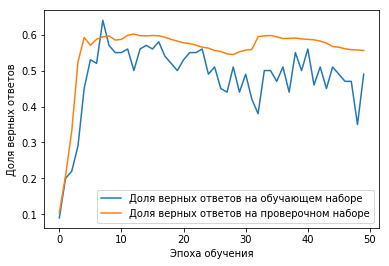

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.85))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 90%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 34ms/sample - loss: 2.8309 - acc: 0.1600 - val_loss: 11.4623 - val_acc: 0.3923
Epoch 2/50
100/100 [==============================] - 1s 10ms/sample - loss: 35.5874 - acc: 0.2100 - val_loss: 11.3486 - val_acc: 0.3788
Epoch 3/50
100/100 [==============================] - 1s 10ms/sample - loss: 33.9461 - acc: 0.2300 - val_loss: 10.7464 - val_acc: 0.4300
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 24.5617 - acc: 0.3200 - val_loss: 9.7303 - val_acc: 0.5089
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 22.4157 - acc: 0.3900 - val_loss: 11.4523 - val_acc: 0.4966
Epoch 6/50
100/100 [==============================] - 1s 10ms/sample - loss: 22.7347 - acc: 0.4300 - val_loss: 9.1295 - val_acc: 0.5515
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 12.8777 - acc: 0.4100 - val_loss: 7.2478 - val_acc: 0.58

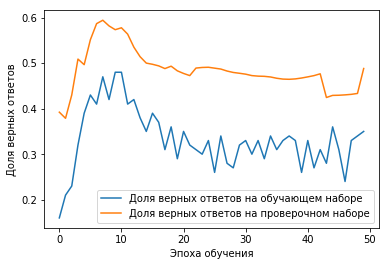

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.90))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 95%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 4s 36ms/sample - loss: 3.1027 - acc: 0.1400 - val_loss: 9.8256 - val_acc: 0.2636
Epoch 2/50
100/100 [==============================] - 1s 11ms/sample - loss: 49.7464 - acc: 0.1100 - val_loss: 10.6160 - val_acc: 0.4034
Epoch 3/50
100/100 [==============================] - 1s 11ms/sample - loss: 77.4121 - acc: 0.1800 - val_loss: 14.6059 - val_acc: 0.3263
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 49.6065 - acc: 0.1500 - val_loss: 12.6640 - val_acc: 0.3428
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 40.3437 - acc: 0.2700 - val_loss: 9.6816 - val_acc: 0.3766
Epoch 6/50
100/100 [==============================] - 1s 11ms/sample - loss: 42.2930 - acc: 0.1700 - val_loss: 5.5084 - val_acc: 0.4923
Epoch 7/50
100/100 [==============================] - 1s 11ms/sample - loss: 24.8088 - acc: 0.2000 - val_loss: 4.4777 - val_acc: 0.523

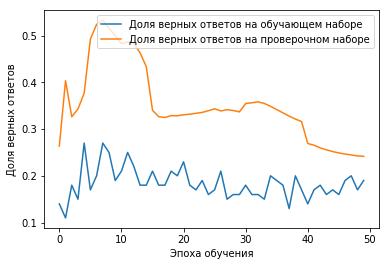

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.95))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Dropout 99%**

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 3s 35ms/sample - loss: 4.9623 - acc: 0.1100 - val_loss: 5.2334 - val_acc: 0.1287
Epoch 2/50
100/100 [==============================] - 1s 10ms/sample - loss: 38.5828 - acc: 0.1300 - val_loss: 4.9065 - val_acc: 0.2254
Epoch 3/50
100/100 [==============================] - 1s 9ms/sample - loss: 60.7743 - acc: 0.1700 - val_loss: 7.1234 - val_acc: 0.2258
Epoch 4/50
100/100 [==============================] - 1s 10ms/sample - loss: 73.5679 - acc: 0.0900 - val_loss: 11.2301 - val_acc: 0.1684
Epoch 5/50
100/100 [==============================] - 1s 10ms/sample - loss: 57.3564 - acc: 0.1400 - val_loss: 19.9817 - val_acc: 0.1059
Epoch 6/50
100/100 [==============================] - 1s 11ms/sample - loss: 82.1231 - acc: 0.1100 - val_loss: 27.6135 - val_acc: 0.1015
Epoch 7/50
100/100 [==============================] - 1s 10ms/sample - loss: 41.3005 - acc: 0.0900 - val_loss: 29.1173 - val_acc: 0.109

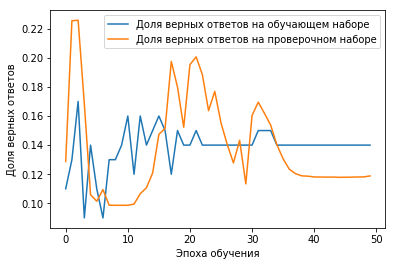

[0.9259167, 0.9418333, 0.93916667]


In [0]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.99))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-1), metrics=["accuracy"])

nVal = 100

history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=200, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


**Несколько функций одновременно**

In [0]:
def evaluateModel(model, batchSizez, epohs, valSplit):
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  nVal = 100

  history = model.fit(x_train[:nVal], 
                    y_train[:nVal], 
                    batch_size=batchSisez, 
                    epochs=50,
                    validation_data=(x_train[nVal:], y_train[nVal:]),
                    verbose=1)
  
  
  currAcc = history.history['val_acc'][-1]
  
  return currAcc, history



In [0]:
models = []

model = Sequential()
model.add(Dense(400, input_dim=784, activation="relu"))

model.add(Dense(10, activation="softmax"))
models.append(model)


model = Sequential()
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))
models.append(model)


model = Sequential()
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.7))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.8))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.9))
model.add(Dense(10, activation="softmax"))
models.append(model)

model = Sequential()
model.add(Dense(400, input_dim=784, activation="relu"))
model.add(Dropout(0.99))
model.add(Dense(10, activation="softmax"))
models.append(model)


batchSisez = 200

acc = []
hist = []
for i in range(len(models)):
  currAcc, currHistory = evaluateModel(models[i], batchSisez, 5, 0.2)
  acc.append(currAcc)
  hist.append(currHistory)
  
print(acc)

Train on 100 samples, validate on 59900 samples
Epoch 1/50
100/100 [==============================] - 1s 13ms/sample - loss: 2.4225 - acc: 0.0500 - val_loss: 2.1901 - val_acc: 0.2042
Epoch 2/50
100/100 [==============================] - 1s 8ms/sample - loss: 2.0479 - acc: 0.3600 - val_loss: 2.0379 - val_acc: 0.3249
Epoch 3/50
100/100 [==============================] - 1s 8ms/sample - loss: 1.7489 - acc: 0.6600 - val_loss: 1.9080 - val_acc: 0.4257
Epoch 4/50
100/100 [==============================] - 1s 8ms/sample - loss: 1.4994 - acc: 0.7800 - val_loss: 1.7834 - val_acc: 0.5009
Epoch 5/50
100/100 [==============================] - 1s 8ms/sample - loss: 1.2773 - acc: 0.8400 - val_loss: 1.6623 - val_acc: 0.5600
Epoch 6/50
100/100 [==============================] - 1s 8ms/sample - loss: 1.0803 - acc: 0.8700 - val_loss: 1.5498 - val_acc: 0.5987
Epoch 7/50
100/100 [==============================] - 1s 8ms/sample - loss: 0.9088 - acc: 0.9400 - val_loss: 1.4498 - val_acc: 0.6264
Epoch 8/50
10

**ВЫВОД:**

1. При запуске NN с парметром dropout с шагом 0.1
сеть планомерно давала улучшение показателя 'acc'

Запуск сети без парметра dropout: 
acc = 0.5745

Запуск сети c dropout шаг 0.1 (последний показатель 0.99): 


При этом, когда показатель dropout превысил 0,8 показатели 'acc' стали ухудшаться, в среднем на 2% а при показателе 0.99 - точность упала до 0.45 (что почти в два раза хуже)


НАИЛУЧШИЙ ПОКАЗАТЕЛЬ 'acc' = 0.7105  достигнут при значении dropout = 0.5 (50%) 

